# Задание

In [10]:
import numpy as np
import pandas as pd
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Задание 1

<center><img src="../misc/images/simple-tree.png" width="440" height="440"/> <center/>

In [2]:
data = pd.read_csv('../datasets/credit_scoring.csv')
data.loc[((data["Возраст"] > 18)&(data["Месячный доход"] > 10000))]

Имя  Возраст  Месячный доход
1  Ольга       43           12000
4   Петр       21           20000

Клиенты, которым должны одобрить заявку на кредит

## Задание 2

In [3]:
iris = load_iris()
print(iris.DESCR) #просмотр деталей датасета


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df_iris= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])
df_iris.head(3)


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   target  
0     0.0  
1     0.0  
2     0.0

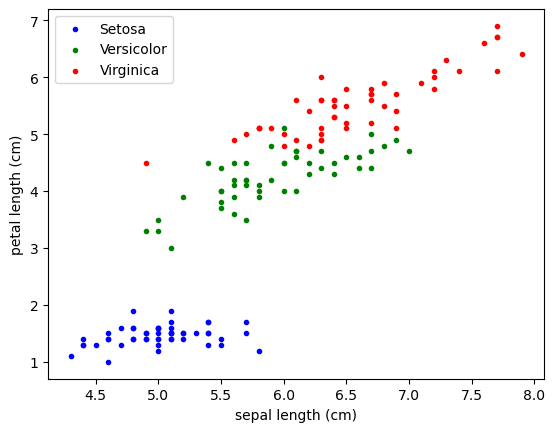

In [5]:
X = df_iris.iloc[0:150, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1],
            color='blue', marker='.', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='green', marker='.', label='Versicolor')
plt.scatter(X[100:150, 0], X[100:150, 1],
            color='red', marker='.', label='Virginica')
 
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend()
plt.show()

## Задание 3

In [6]:
X = df_iris[['sepal length (cm)', 'petal length (cm)']]
y = df_iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
dtc = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
accuracy = dtc.score(X_test, y_test)

round(accuracy, 3)

0.967

In [7]:
from sklearn.metrics import precision_score 
Y_pred = dtc.predict(X_test)
round(precision_score(y_test, Y_pred, average='weighted'), 3)

0.969

## Задание 4

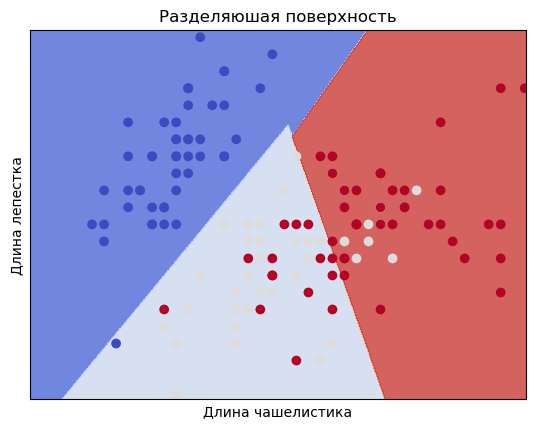

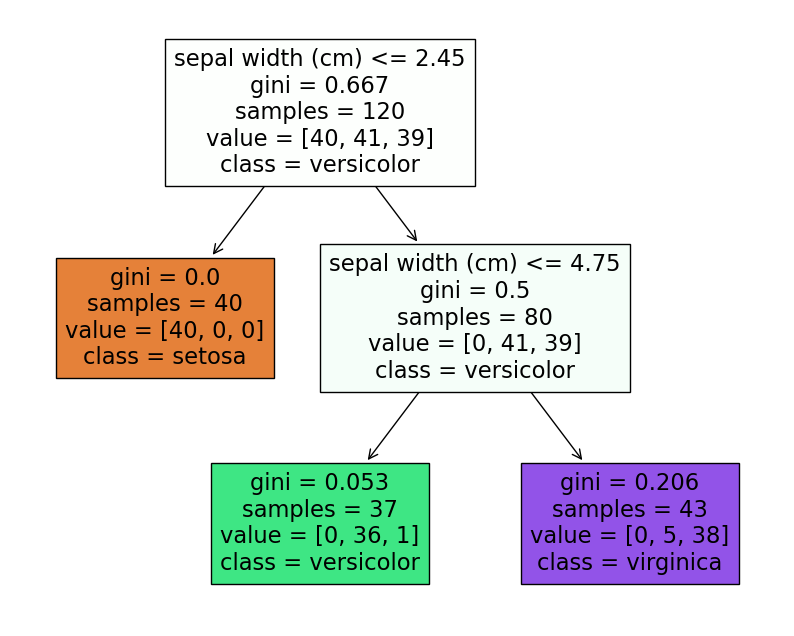

In [8]:
X = iris.data[:, :2] 
y = iris.target

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

C = 1.0 
svc = svm.SVC(kernel='linear', C=C)

svc.fit(X, y)
xx, yy = np.meshgrid(np.linspace(-2.5, 2.5, 500), np.linspace(-2.5, 2.5, 500))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title("Разделяюшая поверхность")
plt.xlabel('Длина чашелистика')
plt.ylabel('Длина лепестка')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.show()
plt.figure(figsize=(10, 8))
plot_tree(dtc, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()


У получившегося дерева 3 листа

## Задание 5

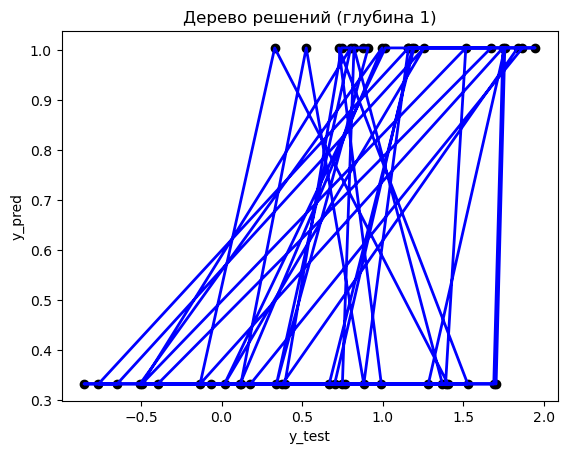

In [9]:
def generate_sin(sample_size, n=1):
    np.random.seed(42)
    X = np.random.random((sample_size, n))*3
    coeffs = 1 + 2 * np.random.random((n, 1))
    y = np.sin(np.matmul(X*X, coeffs)) + np.random.random((sample_size, 1))
    return X, y

X, y = generate_sin(250)[0], generate_sin(250)[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train.reshape(-1, 1), y_train)
y_pred = dtr.predict(X_test.reshape(-1, 1))

plt.scatter(y_test, y_pred, color='black')
plt.plot(y_test, y_pred, color='blue', linewidth=2)
plt.title("Дерево решений (глубина 1)")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Задание 6

In [17]:
X = df_iris[['sepal length (cm)', 'petal length (cm)']]
y = df_iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_depth_values = range(1, 31)
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    dtc = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    train_score = dtc.score(X_train, y_train)
    test_score = dtc.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    diff_score = test_score - train_score
    mean_cross_val_score = cross_val_score(dtc, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                   'train_score': [train_score],
                                   'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score],
                                    'diff_score': [diff_score],
                                   'mse': [mse]})
    scores_data = scores_data.append(temp_score_data)

scores_data[(scores_data['diff_score'] == scores_data['diff_score'].min())] 


max_depth  train_score  test_score  cross_val_score  diff_score  mse
0          8     0.983333         0.9              0.9   -0.083333  0.1

Глубина дерева, на котором MSE на тестовой выборке наилучший: 8

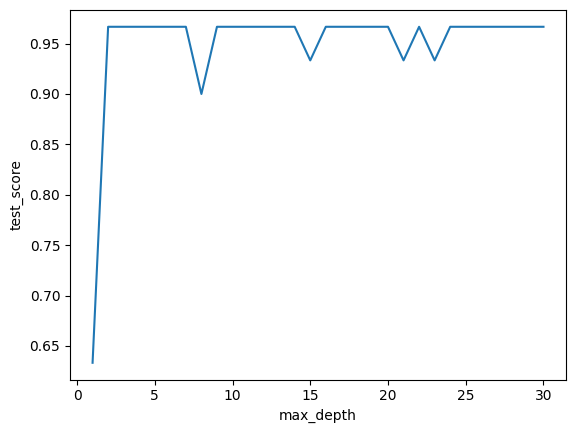

In [13]:
ax = sns.lineplot(x='max_depth', y='test_score', data=scores_data)

## Задание 7

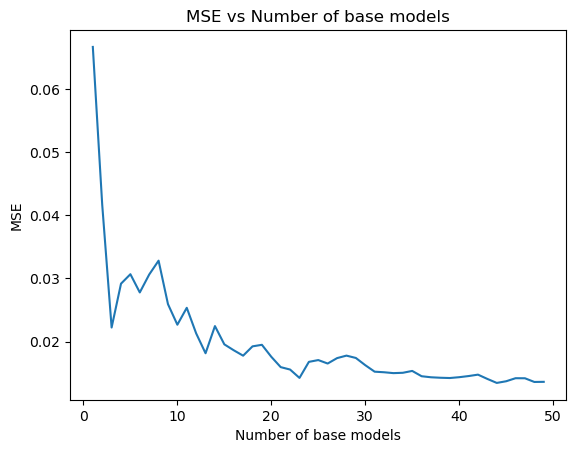

In [14]:
X = df_iris[['sepal length (cm)', 'petal length (cm)']]
y = df_iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5)

n_estimators_list = range(1, 50)
mse_list = []
for n_estimators in n_estimators_list:
    model = BaggingRegressor(base_estimator=dtc, n_estimators=n_estimators, bootstrap=True, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

plt.plot(n_estimators_list, mse_list)
plt.xlabel('Number of base models')
plt.ylabel('MSE')
plt.title('MSE vs Number of base models')
plt.show()

Количество деревьев решений, при котором MSE на тестовой выборке наилучший: 49

## Задание 8

In [15]:
rfr = RandomForestRegressor(max_depth=5,  n_estimators=100, max_features=1, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
round(mse,3)

0.022